# Assignment 1
### Colleges Data
1. School: Contains the name of each school 
2. School_Type: Coded 'LibArts' for liberal arts and 'Univ' for university 
3. SAT: Median combined Math and Verbal SAT score of students 
4. Acceptance: % of applicants accepted 
5. $/Student: Money spent per student in dollars 
6. Top 10%: % of students in the top 10% of their h.s. graduating class 
7. %PhD: % of faculty at the institution that have PhD degrees 
8. Grad%: % of students at institution who eventually graduate 

In [3]:
import pandas as pd
from pandas import plotting
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlib
import plotly.plotly as py
import pylab 
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import math

col_dat = pd.read_csv('colleges_data.txt',sep='\t', header = 0, index_col=False)
LA_col = col_dat[col_dat['School_Type']=='Lib Arts']
UNIV_col = col_dat[col_dat['School_Type']=='Univ']
LA_col.describe()

,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
count,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000
mean,1256.640000,40.560000,21755.560000,67.240000,88.24000,84.120000
std,43.673867,12.516922,3455.726444,10.802315,6.66008,6.091798
min,1170.000000,22.000000,17520.000000,47.000000,75.00000,72.000000
25%,1230.000000,33.000000,18872.000000,61.000000,82.00000,80.000000
50%,1255.000000,38.000000,20377.000000,68.000000,90.00000,85.000000
75%,1290.000000,49.000000,24718.000000,76.000000,93.00000,88.000000
max,1336.000000,67.000000,27879.000000,86.000000,98.00000,93.000000


In [4]:
UNIV_col.describe()

,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
count,25.00000,25.000000,25.000000,25.000000,25.000000,25.00000
mean,1271.28000,35.120000,38738.840000,81.640000,92.880000,82.84000
std,76.89469,13.875398,17710.329859,12.175385,9.148406,8.86792
min,1109.00000,17.000000,19365.000000,52.000000,58.000000,61.00000
25%,1225.00000,24.000000,26730.000000,77.000000,91.000000,76.00000
50%,1280.00000,31.000000,37137.000000,85.000000,96.000000,86.00000
75%,1327.00000,45.000000,45879.000000,90.000000,98.000000,90.00000
max,1400.00000,64.000000,102262.000000,98.000000,100.000000,95.00000


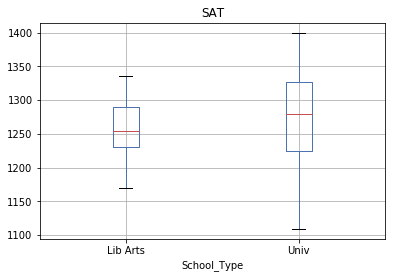

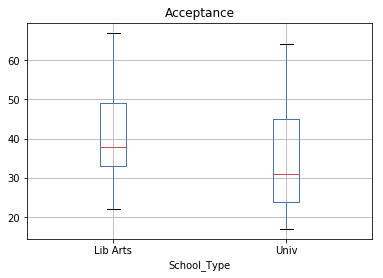

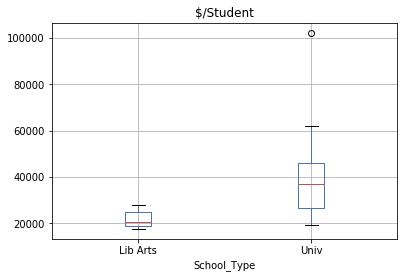

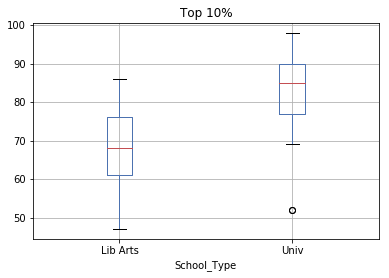

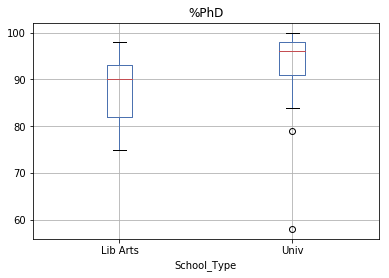

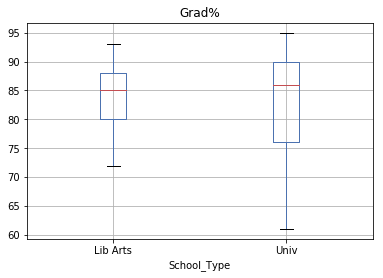

In [5]:
plt.style.use('seaborn-deep')
ax=col_dat.boxplot(column="SAT", by="School_Type")
ax.get_figure().suptitle('');
ax=col_dat.boxplot(column="Acceptance", by="School_Type")
ax.get_figure().suptitle('');
ax=col_dat.boxplot(column="$/Student", by="School_Type")
ax.get_figure().suptitle('');
ax=col_dat.boxplot(column="Top 10%", by="School_Type")
ax.get_figure().suptitle('');
ax=col_dat.boxplot(column="%PhD", by="School_Type")
ax.get_figure().suptitle('');
ax=col_dat.boxplot(column="Grad%", by="School_Type")
ax.get_figure().suptitle('');

Среди наблюдений имеются выбросы в трех векторах данных: "$/student", "%PhD" и "Top 10%" для университетов.
Cal Tech является иследовательским институтом с самыми высокими затратами на студентов в сравнении с остальными. Он входит в топ лучших университетов мира и там обучаются студенты с самыми высокими показателями SAT. Так же для него характерны высокие показатели для переменной Top 10% и хороший преподавательский состав. При рассмотрении всех университетов, стоило бы исключить Cal tech, так как такие высокие затраты на студентов, скорее исключение, нежели правило.

Университет Джонса Хопкинса имеет очень низкий % преподавателей с докторскими степенями, что так же является выбросом.(может просто случайность или ошибка, потому что остальные показатели находятся на достойном уровне)

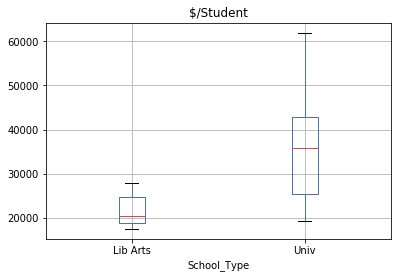

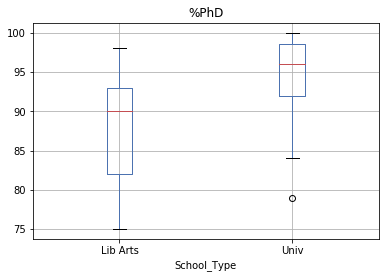

In [6]:
col_dat1=col_dat[col_dat['$/Student']<80000];
col_dat1=col_dat1[col_dat1['%PhD']>70];
ax=col_dat1.boxplot(column="$/Student", by="School_Type")
ax.get_figure().suptitle('');

ax=col_dat1.boxplot(column="%PhD", by="School_Type")
ax.get_figure().suptitle('');

Выше приведены два боксплота без выбросов.

По построенным "ящикам" и расчитанным характеристикам можно заключить, что в гумманитарные университеты достаточно просто поступить. В исследовательских университетах более высокие показатели затрат на студентов и более высокий процент преподавателей имеет докторскую степень, так же большинство обучающихся там входило в топ 10% у себя в школе. Возможно это связано с тем, что обучение в исследовательских университетах считается престижным и более востребованным, из-за чего возникает больший приток денег и высокая конкуренция за места.

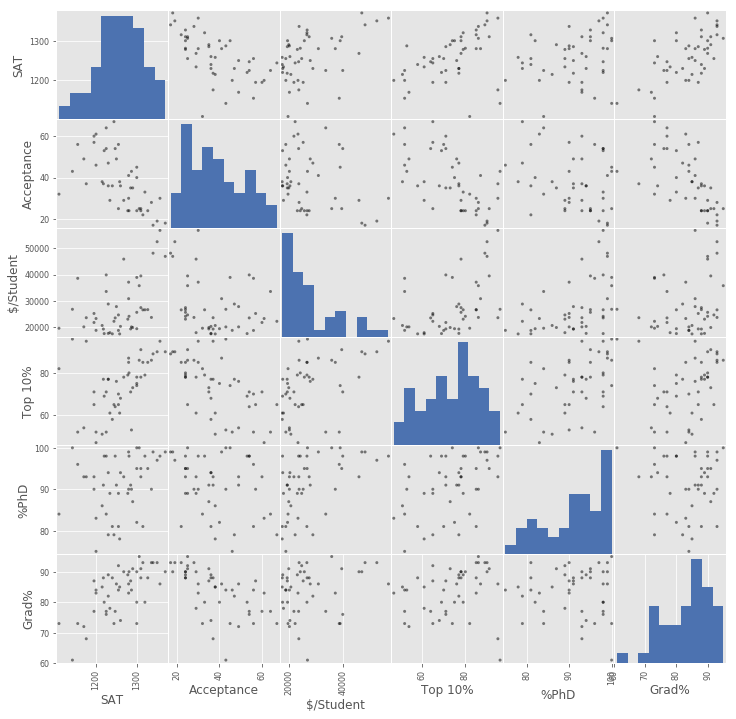

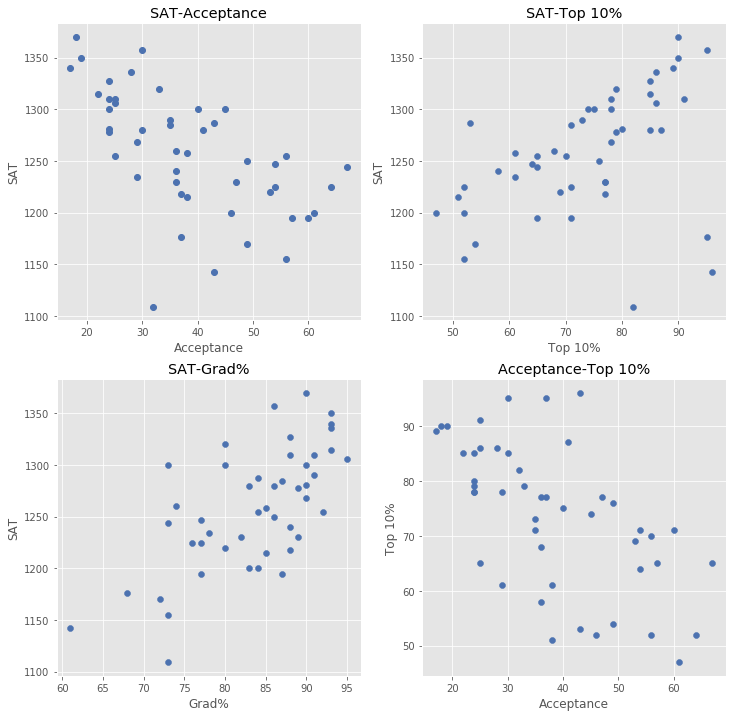

In [10]:
plotting.scatter_matrix(col_dat1,figsize=(12,12),color='black');
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.plot(col_dat1["Acceptance"], col_dat1["SAT"], "o")
plt.title('SAT-Acceptance')
plt.xlabel("Acceptance");
plt.ylabel("SAT");
plt.subplot(222)
plt.scatter(col_dat1["Top 10%"], col_dat1["SAT"], marker = "o")
plt.title('SAT-Top 10%')
plt.xlabel("Top 10%");
plt.ylabel("SAT");
plt.subplot(223)
plt.scatter(col_dat1["Grad%"], col_dat1["SAT"], marker = "o")
plt.title('SAT-Grad%')
plt.xlabel("Grad%");
plt.ylabel("SAT");
plt.subplot(224)
plt.scatter(col_dat1["Acceptance"], col_dat1["Top 10%"], marker = "o")
plt.title('Acceptance-Top 10%')
plt.xlabel("Acceptance");
plt.ylabel("Top 10%");

По гистограммам можно судить о ярко выраженной левой ассиметрии для с.в. "$/Student" (видимо большинству университетов жалко денег на студентов) и о правой ассиметрии с.в. "PhD%", что говорит о том, что в большинстве университетов преподавательский состав имеет докторскую степень (его среднее значение по университетам, рассчитанное выше, равно 90,6%).

По диаграммам рассеяния можно судить о:
1. Наличии отрицательной связи результатов SAT и числа принятых заявлений. Так как средний балл SAT в университете высокий, то поступить туда сложнее(из-за сильной конкуренции), вследствие чего показатель принятых заявлений довольно низкий.
2. Наличии положительной связи между переменными SAT и Top 10%. Если балл SAT среди студентов высокий, то скорее всего большинство из них было лучшими у себя в школе.
3. Наличии положительной зависимости между SAT и Grad%, что весьма естественно. Если студенты университета в среднем напиисали хорошо SAT, то их отношение к учебе можно считать ответственным и подавляющее число таких студентов закончит университет.
4. Отрицаиельная связь между переменными Top 10% и Acceptance возникает из за связи первого и второго пунктов.

,$/Student,%PhD,Acceptance,Grad%,SAT,Top 10%
Shapiro-Wilk’s test statistic,0.847553,0.929917,0.955951,0.939731,0.987934,0.963118
p-value,0.000022,0.007527,0.074321,0.017407,0.904427,0.142987


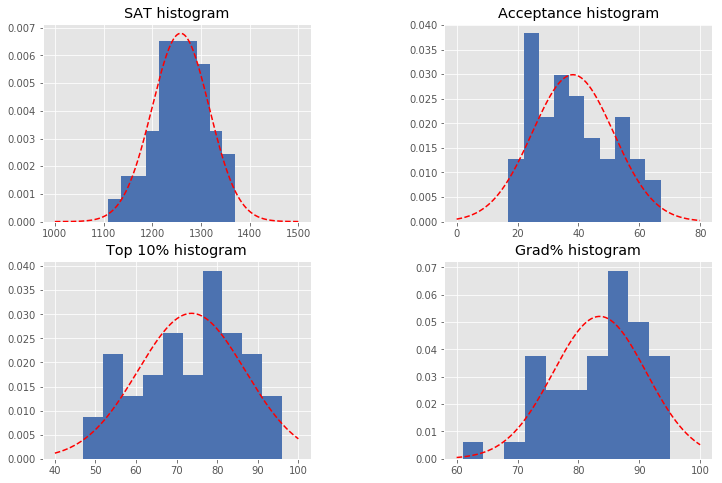

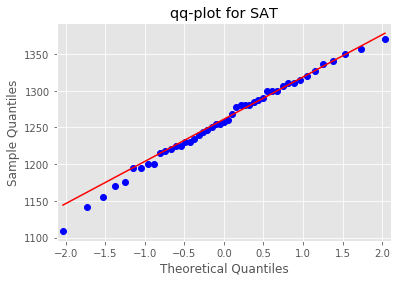

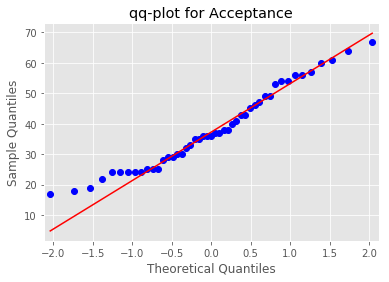

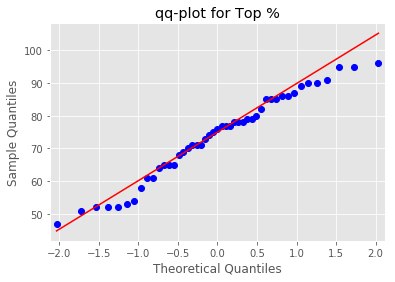

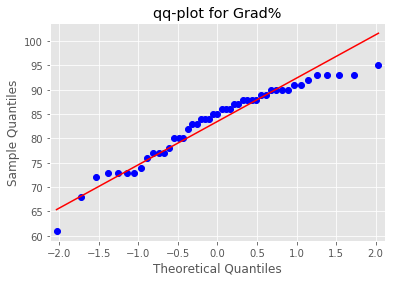

In [11]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))
x=np.linspace(1000,1500,1000)
ax[0,0].hist(col_dat1["SAT"], label='SAT', normed=True)
ax[0,0].set_title("SAT histogram")
ax[0,0].plot(x,stats.norm.pdf(x,col_dat1['SAT'].mean(),col_dat1['SAT'].std()), 'r--')
x=np.linspace(0,80,200)
ax[0,1].hist(col_dat1["Acceptance"], label='Acceptance', normed=True)
ax[0,1].plot(x,stats.norm.pdf(x,col_dat1['Acceptance'].mean(),col_dat1['Acceptance'].std()), 'r--')
ax[0,1].set_title("Acceptance histogram")
x=np.linspace(40,100,200)
ax[1,0].hist(col_dat1["Top 10%"], label='Top 10%', normed=True)
ax[1,0].plot(x,stats.norm.pdf(x,col_dat1['Top 10%'].mean(),col_dat1['Top 10%'].std()), 'r--')
ax[1,0].set_title("Top 10% histogram")
x=np.linspace(60,100,200)
ax[1,1].hist(col_dat1["Grad%"], label='Grad%', normed=True)
ax[1,1].plot(x,stats.norm.pdf(x,col_dat1['Grad%'].mean(),col_dat1['Grad%'].std()), 'r--')
ax[1,1].set_title("Grad% histogram")
fig.subplots_adjust(wspace=0.5,)
sm.qqplot(col_dat1["SAT"], line ='q');
plt.title('qq-plot for SAT');
sm.qqplot(col_dat1["Acceptance"], line ='q');
plt.title('qq-plot for Acceptance');
sm.qqplot(col_dat1["Top 10%"], line ='q');
plt.title('qq-plot for Top %');
sm.qqplot(col_dat1["Grad%"], line ='q');
plt.title('qq-plot for Grad%');
shapiroWilkDf = pd.DataFrame({
     'SAT': stats.shapiro(col_dat1["SAT"]),
     'Acceptance': stats.shapiro(col_dat1["Acceptance"]),
     'Top 10%': stats.shapiro(col_dat1["Top 10%"]),
     'Grad%': stats.shapiro(col_dat1["Grad%"]),
     '%PhD': stats.shapiro(col_dat1["%PhD"]),
     '$/Student': stats.shapiro(col_dat1["$/Student"])
}, index=['Shapiro-Wilk’s test statistic','p-value'])
shapiroWilkDf

Исходя из построенных гистограмм, qq-plot и теста на нормальность Шапиро-Вилка, можно сделать вывод о том, что с.в. SAT и Top 10% распределенны нормально.

,SAT and $/Student,SAT and %PhD,SAT and Acceptance,SAT and Grad%,SAT and Top 10%
Pearson’s correlation coefficient,0.468679,0.265519,-0.607610,6.650399e-01,0.445580
2-tailed p-value,0.000891,0.071259,0.000006,3.415748e-07,0.001697


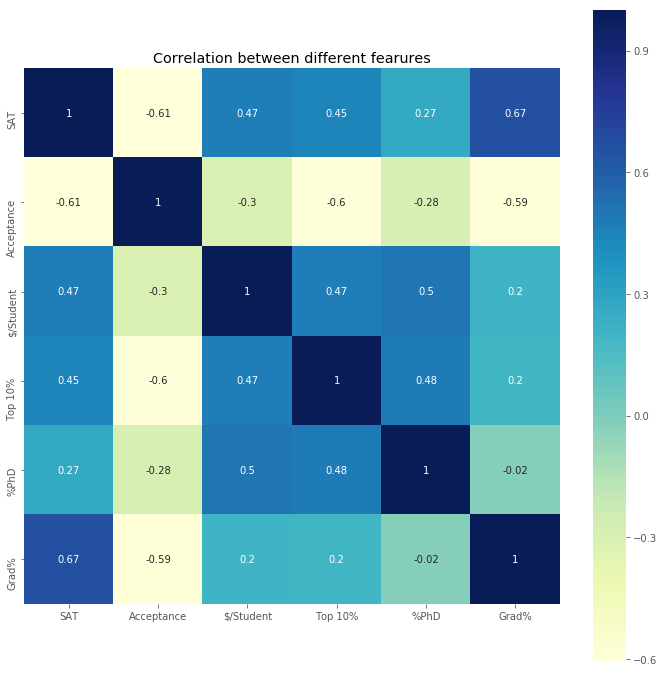

In [84]:
correlation = col_dat1.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap="YlGnBu")
plt.title("Correlation between different fearures")
personDf = pd.DataFrame({
     'SAT and Acceptance': stats.pearsonr(col_dat1["SAT"],col_dat1["Acceptance"]),
     'SAT and Top 10%': stats.pearsonr(col_dat1["SAT"],col_dat1["Top 10%"]),
     'SAT and Grad%': stats.pearsonr(col_dat1["SAT"],col_dat1["Grad%"]),
     'SAT and $/Student': stats.pearsonr(col_dat1["SAT"],col_dat1["$/Student"]),
     'SAT and %PhD': stats.pearsonr(col_dat1["SAT"],col_dat1["%PhD"])
}, index=['Pearson’s correlation coefficient','2-tailed p-value'])
personDf

По результатам теста Пирсона на коррелированность и из таблицы коэффициентов корреляции можно заключить о наличии взаимосвязи между баллом за SAT и всеми остальными переменными.

Если студент получил высокие баллы за SAT он может попасть в престижный университет, который "не пожалеет копейку на студента", в котором хороший преподавательский состав и который считается престижным, в следствии чего там высокая конкуренция и большое число непринятых заявлений. Хотя данные зависимости не являются сильными.